In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split

seaborn.set()

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
dfB = pd.read_csv("wbc.csv")

In [3]:
dfB=dfB[dfB.bare_nuclei!='?']
dfB=dfB.reset_index()
dfB['bare_nuclei']=dfB['bare_nuclei'].astype(object).astype(int)
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
index                 683 non-null int64
clump_thickness       683 non-null int64
cell_size             683 non-null int64
cell_shape            683 non-null int64
marginal_adhesion     683 non-null int64
epitelial_cellsize    683 non-null int64
bare_nuclei           683 non-null int32
bland_chromatin       683 non-null int64
normal_nucleoli       683 non-null int64
mitoses               683 non-null int64
jenis                 683 non-null int64
dtypes: int32(1), int64(10)
memory usage: 56.1 KB


In [4]:
X = dfB.drop([dfB.columns[-1]], axis=1)
y = dfB.jenis.map({2: 0, 4: 1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [6]:
from sklearn import svm

In [7]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [8]:
from sklearn import metrics

In [9]:
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [10]:
svr=svm.SVC()

In [11]:
C_range = [2**i for i in [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]]
gamma_range = [2**i for i in [-15, -13, -11, -9, -7, -5, -3, -1, 1, 3]]

In [12]:
from sklearn.metrics import confusion_matrix
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((228.35*FP)+(2850000*FN))
    return costBC

In [13]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [14]:
from sklearn.metrics import make_scorer
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=False)
score_specificity=make_scorer(specificity, greater_is_better=True)

In [15]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:


# Set the parameters by cross-validation
tuned_parameters2 = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},]

scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(svr, tuned_parameters2, cv=10,
                       scoring=my_custom_scorer)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred2 = y_test, clf2.predict(X_test)
    print(classification_report(y_true, y_pred2))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer, greater_is_better=False)

Best parameters set found on development set:

{'C': 32, 'kernel': 'rbf', 'gamma': 3.0517578125e-05}

Grid scores on development set:

-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 3.0517578125e-05}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.0001220703125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.00048828125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.001953125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.0078125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.03125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.125}
-44196827.1335 (+/-2849665.6479) for {'C': 0.03125, 'kernel': 'rbf', 'gamma'

In [16]:
print("Best recall obtained: {0}".format(clf2.best_score_))
print("Parameters:")
for key, value in clf2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best recall obtained: -1428254.572319475
Parameters:
	C: 32
	kernel: rbf
	gamma: 3.0517578125e-05


In [17]:
clf2.best_estimator_

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3.0517578125e-05,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
ac=svm.SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3.0517578125e-05,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
ac.fit(X_train,y_train)

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3.0517578125e-05,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
y_predac = ac.predict(X_test)
accuracy = accuracy_score(y_test, y_predac)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predac)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9558
Precision: 0.9744
Recall: 0.9048
F1: 0.9383


In [21]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ac,X_train,y_train,cv=10)

In [22]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9759 (+/- 0.0416)


In [23]:
scores2=cross_val_score(ac,X_train,y_train,cv=10,scoring='recall')

In [24]:
print("recall: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

recall: 0.9679 (+/- 0.0642)


In [25]:
scores3=cross_val_score(ac,X_train,y_train,cv=10,scoring=score_specificity)

In [27]:
print("specificity: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

specificity: 0.9800 (+/- 0.0533)


In [26]:
scores4=cross_val_score(ac,X_train,y_train,cv=10,scoring='f1')

In [27]:
print("F1: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

F1: 0.9651 (+/- 0.0595)


In [28]:
classifier=ac

In [29]:
names='SVM-RBF-Dataset B'

In [30]:
score=ac.predict_proba(X_test)

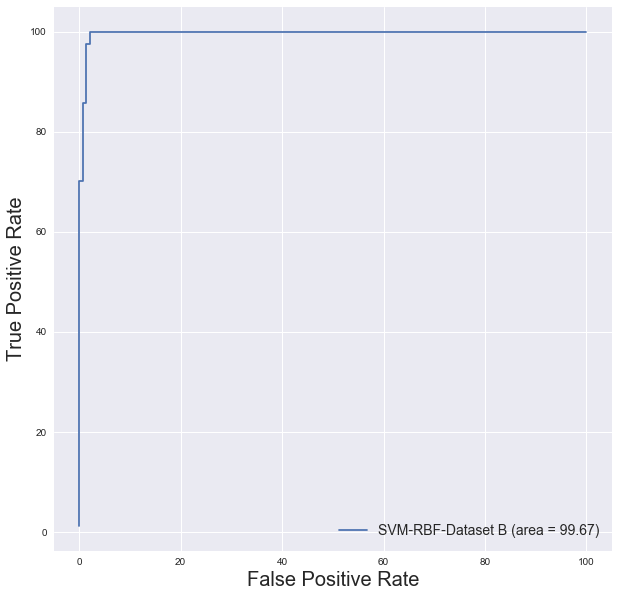

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fpr, tpr, thresholds = roc_curve(y_test, score[:,1])
auc = roc_auc_score(y_test, score[:,1])
plt.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names, auc*100))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(prop={'size':14})
ax.set_xlabel('False Positive Rate',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
plt.show()